In [1]:
from sklearn.datasets import load_iris
import pandas as pd
li=load_iris()


In [2]:
dir(li)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
li.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df=pd.DataFrame(li.data,columns=li.feature_names)
df['target']=li.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df['flower name']=df.target.apply(lambda x: li.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
li.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

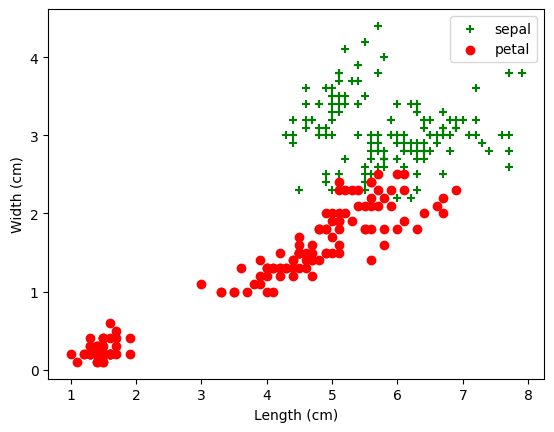

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],color='green',marker='+',label='sepal')
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],color='red',label='petal')
plt.xlabel("Length (cm)")
plt.ylabel("Width (cm)")
plt.legend()
plt.show()

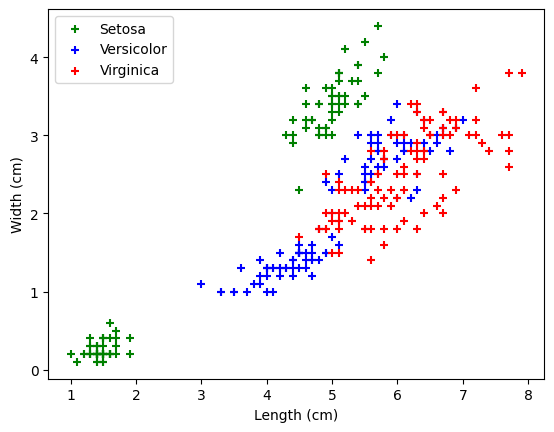

In [8]:
df0=df[df['target']==0]
df1=df[df['target']==1]
df2=df[df['target']==2]
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker="+",label="Setosa")
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker="+")
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker="+",label="Versicolor")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker="+")
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',marker="+",label="Virginica")
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red',marker="+")
plt.xlabel("Length (cm)")
plt.ylabel("Width (cm)")
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
x=df.drop(['target','flower name'],axis='columns') #indep var
y=df.target

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [12]:
model.score(x_test,y_test)

0.9666666666666667

In [13]:
y_pred =model.predict(x_test)

In [14]:
#where is point 4 perecent error 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 10]], dtype=int64)

<Axes: >

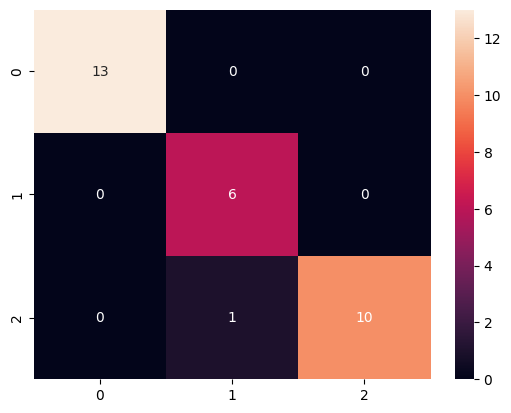

In [15]:
import seaborn as sns
sns.heatmap(cm,annot=True)


In [18]:
import joblib
joblib.dump(model,'svm_model')

['svm_model']